In [117]:
%matplotlib inline
import numpy as np
from pylab import *
from astropy.io import fits
from statsmodels.robust import scale
from sklearn import preprocessing as pp
from time import time

from seaborn import *

style.use('fivethirtyeight')
from IPython import display
rcParams['axes.grid'] = False
rcParams['lines.linewidth'] = 1.0

In [3]:
from ipywidgets import widgets
# from IPython.display import display
from IPython         import display

In [4]:
mask0   = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34_mask.fits')
darks0  = fits.open('NRCNRCALONG-DARK-53421914341_1_485_SE_2015-12-08T21h45m34.fits')

In [5]:
nQuirks = sum(mask0[0].data[0] != 0)
nQuirks

5042

In [6]:
mask    = mask0[0].data[0]
darks   = darks0[0].data

In [7]:
darks

array([[[7322, 8931, 8394, ..., 7903, 8897, 6407],
        [8227, 7956, 8631, ..., 6691, 8393, 8086],
        [8205, 8517, 8245, ..., 6479, 8690, 7070],
        ..., 
        [7100, 7810, 6948, ..., 7013, 7934, 7239],
        [6623, 7681, 8734, ..., 7695, 8100, 7239],
        [8685, 8306, 7008, ..., 7078, 7742, 7082]],

       [[7338, 8954, 8410, ..., 7856, 8857, 6362],
        [8240, 7977, 8652, ..., 6647, 8347, 8043],
        [8232, 8538, 8263, ..., 6438, 8652, 7024],
        ..., 
        [7131, 7849, 6996, ..., 6980, 7897, 7213],
        [6660, 7718, 8773, ..., 7658, 8077, 7214],
        [8726, 8332, 7040, ..., 7041, 7703, 7057]],

       [[7365, 8980, 8438, ..., 7890, 8876, 6383],
        [8264, 7997, 8674, ..., 6675, 8371, 8063],
        [8251, 8561, 8284, ..., 6468, 8669, 7043],
        ..., 
        [7132, 7844, 6997, ..., 6986, 7903, 7215],
        [6663, 7717, 8777, ..., 7669, 8073, 7221],
        [8734, 8340, 7045, ..., 7059, 7717, 7068]],

       ..., 
       [[7361, 8972, 

In [8]:
quirks_store  = np.loadtxt('quirks_FINAL_for_cnaw_mask_CV3_dark_frames.txt')
classes_store = np.loadtxt('myclasses_new_FINAL_for_cnaw_mask_CV3_dark_frames.txt').astype(int)

Check If All Class 1 Bad Pixels Are Indeed Just Noisy Pixels
---

In [9]:
quirks_store[classes_store == 1].shape

(141, 108)

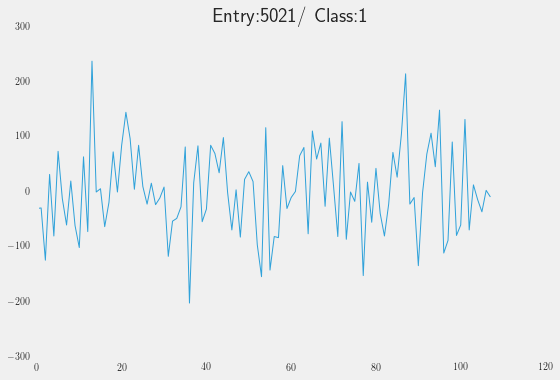

In [10]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
corrections = []
for cnow in np.where(classes_store == 1)[0]:
    # ax.lines.pop()
    ax.clear()
    ax.plot(quirks_store[cnow] - median(quirks_store[cnow]))
    ax.set_title('Entry:' + str(cnow) + '/ Class:' + str(classes_store[cnow]))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
#     checkClass = input('Is this a Noisy Pixel? ');
#     if checkClass != '':
#         corrections.append([cnow, checkClass])
# for cnow in np.where(classes_store == 1)[0]:
#     plt.plot(quirks_store[cnow])
#     display.clear_output(wait=True)
#     display.display(plt.gcf())
#     checkClass = input('Is this a Noisy Pixel? ');print(checkClass)
#     plt.clf()
#     display.clear_output(wait=True)

Check If All Class 4 Bad Pixels Are Indeed Just CR Pixels
---

In [11]:
quirks_store[classes_store == 4].shape

(703, 108)

In [13]:
np.where(classes_store == 6)[0]

array([  44,  196,  223,  307,  386,  406,  413,  466,  845,  909, 1002,
       1118, 1168, 1256, 1315, 1581, 1812, 2090, 2109, 2131, 2191, 2206,
       2246, 2360, 2459, 2524, 2533, 2584, 2639, 2676, 2725, 2882, 2887,
       2931, 2932, 2936, 2948, 2991, 2996, 3036, 3045, 3052, 3064, 3147,
       3350, 3440, 3474, 3559, 3696, 3836, 3914, 3951, 4077, 4103, 4293,
       4294, 4298, 4334, 4435, 4448, 4466, 4745, 4834, 4866, 5040])

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


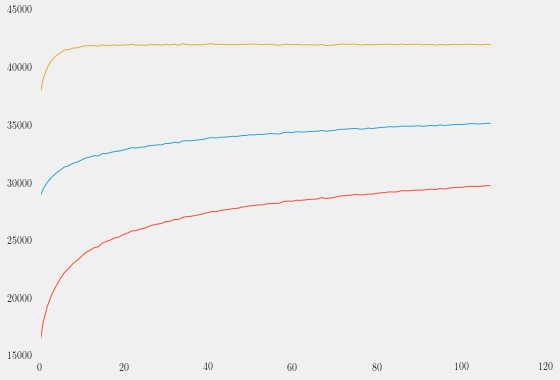

In [14]:
plot(quirks_store[140]);
plot(quirks_store[260]);
plot(quirks_store[380]);

In [15]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).shape

(108, 5042)

In [16]:
((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T[classes_store == 4].T.shape

(108, 703)

In [17]:
np.sum(classes_store == 2) // 100

36

In [18]:
quirk_store_norm = ((quirks_store.T - np.min(quirks_store,axis=1)) / (np.max(quirks_store,axis=1) - np.min(quirks_store, axis=1))).T

In [19]:
classNow  = 4
k = 1
stepsize  = 100
quirksNow = quirk_store_norm[classes_store == classNow][k*stepsize:(k+1)*stepsize].T
quirksNow.shape

(108, 100)

In [20]:
classes_store_bak = np.copy(classes_store)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


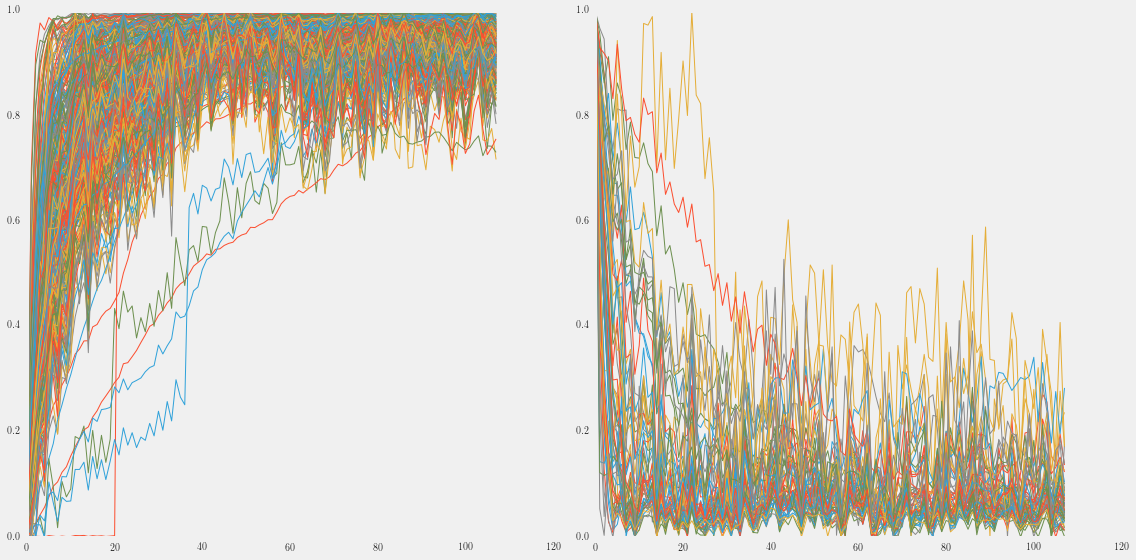

In [21]:
fig = figure(figsize=(16,8))
ax1  = fig.add_subplot(121)
ax2  = fig.add_subplot(122)
ax1.plot(quirk_store_norm[classes_store == 5].T, lw=1);
ax2.plot(quirk_store_norm[classes_store == 6].T, lw=1);

In [22]:
darks.shape

(108, 2048, 2048)

In [23]:
darks_trnspsd = np.transpose(darks, axes=(1,2,0))

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


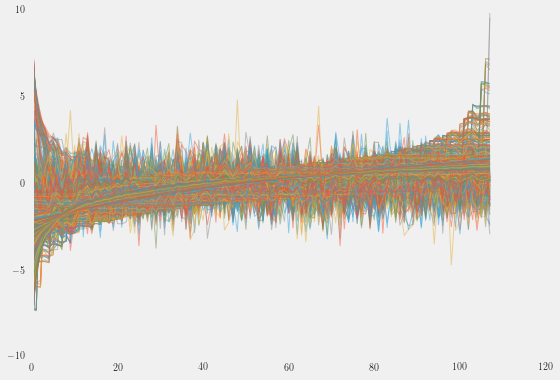

In [24]:
for irow in range(len(quirks_store)):
    quirk_pp  = pp.scale(quirks_store[irow])
    # print(std(quirk_pp), scale.mad(quirk_pp))
    plot(quirk_pp, alpha=0.5)# - median(darks_trnspsd[icol,irow])))
# darks_scaled  = pp.scale(darks,axis=0)

In [25]:
darks.shape, darks_trnspsd.shape

((108, 2048, 2048), (2048, 2048, 108))

In [26]:
darks_reshaped = darks_trnspsd.reshape(darks_trnspsd.shape[0]*darks_trnspsd.shape[1], darks_trnspsd.shape[2])

In [27]:
darks_reshaped.shape

(4194304, 108)

In [28]:
icol,irow = np.random.randint(0,2048,2)
pp.scale(darks_trnspsd[icol,irow] / median(darks_trnspsd[icol,irow]))

array([-0.3594493 , -1.39803166, -1.28575249, -1.11733373, -2.32433485,
       -1.14540352,  1.07211017, -1.00505455,  0.0896674 , -2.26819527,
       -0.66821703,  0.59492368,  0.5107143 ,  1.4089477 , -1.20154311,
        0.62299347, -0.75242641,  0.23001636, -1.36996187, -1.62259001,
       -0.97698476, -1.79100877,  1.60543625, -1.28575249, -1.87521816,
       -1.51031084, -0.97698476, -0.78049621,  1.01597058, -0.75242641,
       -0.24717013, -1.03312435, -0.21910033, -0.97698476,  0.73527265,
        0.34229554, -1.28575249, -1.14540352,  0.0615976 , -0.13489095,
        0.59492368,  2.2510415 , -0.41558889,  1.10017997, -0.13489095,
        0.56685389, -0.07875137, -0.72435662,  0.81948203,  0.34229554,
       -0.19103054,  2.05455295,  0.0615976 ,  0.48264451, -0.10682116,
        0.23001636, -0.75242641,  0.14580698,  1.4089477 ,  0.79141224,
        1.04404038, -0.19103054,  1.29666852, -1.03312435, -0.808566  ,
       -0.27523992,  0.39843513,  0.53878409, -1.48224105, -1.06

In [29]:
darks_norm  = darks / median(darks, axis=0)

In [30]:
darks_std   = std(darks_norm, axis=0)
darks_std.shape

(2048, 2048)

In [31]:
darks_med_std = median(darks_std)

In [32]:
darks_flat = []
for irow in range(darks_reshaped.shape[0]):
    limit_check = std(darks_reshaped[irow] / median(darks_reshaped[irow])-1) < 2*darks_med_std
    # print(limit_check, std(darks_reshaped[irow] / median(darks_reshaped[irow])), darks_med_std)
    if limit_check:
        darks_flat.append(darks_reshaped[irow])

nNormals    = len(darks_flat)
nNormals

4188264

In [33]:
darks_flat = np.array(darks_flat)
darks_flat.shape

(4188264, 108)

In [34]:
darks_norm_trnspsd = np.transpose(darks_norm, axes=(1,2,0))
darks_norm_flat    = darks_norm_trnspsd[darks_std < 2*darks_med_std]

In [35]:
darks_norm_flat.shape

(4188264, 108)

In [36]:
darks_norm_flat.shape[0]

4188264

Simulate RTNs because the CV3 training data has None
---

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


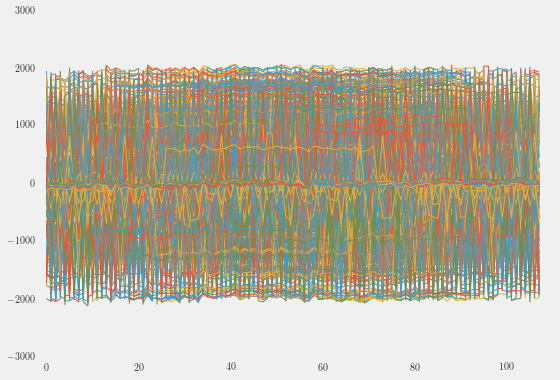

In [47]:
np.random.seed(42)
saturation= 2**16
dynRange  = 2**11
nSamps    = 1000
nSig      = 4.0
nFrames   = darks_norm_flat.shape[1]
rtn_syn   = np.zeros((nSamps, nFrames))

maxRTNs   = np.int(0.9*nFrames)
maxWidth  = 50
minWidth  = 10
rtnCnt    = 0

dark_inds = np.arange(darks_reshaped.shape[0])
frame_inds= np.arange(darks_reshaped.shape[1])
for irow in np.random.choice(dark_inds,nSamps,replace=False):
    rtn_syn[rtnCnt] = np.copy(darks_reshaped[irow])
    if darks_reshaped[irow].std() > 50:
        print(darks_reshaped[irow].std())
    nRTNs     = np.random.randint(maxRTNs)
    
    coinflip  = np.random.randint(0, 2)
    sign_rand = np.random.choice([-1,1])
    minJump   = nSig*std(rtn_syn[rtnCnt] - median(rtn_syn[rtnCnt]))
    jump      = np.random.uniform(minJump,dynRange)
    if coinflip:
        RTN_locs  = np.random.choice(frame_inds, nRTNs, replace=False)
        for iRTN in RTN_locs:
            rtn_syn[rtnCnt][iRTN] += sign_rand*jump
    else:
        randWidth = np.random.randint(minWidth, maxWidth + 1)
        randStart = np.random.randint(minWidth, nFrames - randWidth - minWidth + 1)
        rtn_syn[rtnCnt][randStart:randStart+randWidth] += sign_rand*jump
    
    rtn_syn[rtnCnt][rtn_syn[rtnCnt] > saturation] = saturation
    # if not rtnCnt % 100:
    plot(rtn_syn[rtnCnt] - median(rtn_syn[rtnCnt]))
    
    rtnCnt  = rtnCnt + 1

xlim(-1,110);
# ylim(-100,100);

In [ ]:
classLabels = {1:'Noisy', 2:'HP', 3:'IHP', 4:'LHP', 5:'SHP', 6:'CR', 7:'RTN0', 8:'RTN1'}
for k in range(1,9):
    print(k, classLabels[k])

In [ ]:
fig = figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

darksMed_scaled = darks_flat_med_axis0 / median(darks_flat_med_axis0)# pp.scale(darks_flat_med_axis0)

classLabels = {1:'Noisy', 2:'HP', 3:'IHP', 4:'LHP', 5:'SHP', 6:'CR', 7:'RTN0', 8:'RTN1'}

quirkCheck = np.zeros(len(quirks_store))
for iQuirk, quirkNow in enumerate(quirks_store):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    
    classNow = classes_store[iQuirk]
    classOut = classNow
    if classNow == 3:
        classOut = 7
    if classNow == 4:
        classOut = 6
    if classNow == 5:
        classOut = 5
    if classNow == 6:
        classOut = 3
    # ax1.plot(darks_reshaped[irow][1:] / median(darks_reshaped[irow][1:]) - darks_flat_med_axis0_norm);
    
    # Plot Subtraction frame: (Darknow - min(Darknow)) - (DarkMed - min(DarkMed))
    # darkNowMinusMed = (darks_reshaped[irow][1:] - np.min(darks_reshaped[irow][1:])) - \
    #                   (darks_flat_med_axis0[1:] - np.min(darks_flat_med_axis0[1:]))
    
    quirkNow_scaled = pp.scale(quirkNow)
    
    quirkMinusMed = (quirkNow_scaled - np.min(quirkNow_scaled)) - (darksMed_scaled - np.min(darksMed_scaled))
    
    ax1.hist((quirkNow - np.min(quirkNow))-(darks_flat_med_axis0 - np.min(darks_flat_med_axis0)), bins=20, normed=True, alpha=0.50)
    ax1.hist((darks_flat_med_axis0 - np.median(darks_flat_med_axis0)), bins=20, normed=True, alpha=0.25)
    kde1 = sm.nonparametric.KDEUnivariate((quirkNow - np.min(quirkNow))-(darks_flat_med_axis0 - np.min(darks_flat_med_axis0)))
    kde2 = sm.nonparametric.KDEUnivariate((darks_flat_med_axis0 - np.median(darks_flat_med_axis0)))
    kde1.fit()
    kde2.fit()
    ax1.plot(kde1.support, kde1.density, lw=2, color=rcParams['axes.color_cycle'][0])
    ax1.plot(kde2.support, kde2.density, lw=2, color=rcParams['axes.color_cycle'][1])
    ylims = ax1.get_ylim()
    xlims = ax1.get_xlim()
    xyNow1 = [np.min(xlims) + 0.1*diff(xlims),
              np.min(ylims) + 0.9*diff(ylims)]
    ax1.annotate(str(classOut) + ': ' + classLabels[classOut], xyNow1, fontsize=100)
    # ax1.plot()
    # ax1.axvline(median(rtnNow), linestyle='--', color='k')
    ax1.set_title('Subtraction Hist')
    # ax1.plot(darks_reshaped[irow][1:] / median(darks_reshaped[irow][1:]) / darks_flat_med_axis0_norm - 1);
    
    # Plot Normalized Frame: DarkNow vs DarMed
    ax2.plot((quirkNow - np.min(quirkNow))/darksMed_scaled,'o-');
    ylims = ax2.get_ylim()
    xlims = ax2.get_xlim()
    xyNow2 = [np.min(xlims) + 0.1*diff(xlims),
              np.min(ylims) + 0.9*diff(ylims)]
    ax2.annotate(str(classOut) + ': ' + classLabels[classOut], xyNow2, fontsize=100)
    #ax2.plot(darksMed_scaled,'o-')
    ax2.set_title('Normalized Frame')
    
    # Plot Common Mode Correlation Frame
    # ax3.plot((quirkNow - np.min(quirkNow))-(darks_flat_med_axis0 - np.min(darks_flat_med_axis0)), darksMed_scaled,'o')
    # ax3.plot(darksMed_scaled, darksMed_scaled,'o')
    ax3.plot(diff(quirkNow),'o-')
    ax3.plot(diff(darks_flat_med_axis0), 'o-')
    ylims = ax3.get_ylim()
    xlims = ax3.get_xlim()
    xyNow3 = [np.min(xlims) + 0.1*diff(xlims),
              np.min(ylims) + 0.9*diff(ylims)]
    ax3.annotate(str(classOut) + ': ' + classLabels[classOut], xyNow3, fontsize=100)
    ax3.set_title('Diff Mode')
    
    # Plot Raw DN minus Min Dark Ramp: DarkNow - min(DarkNow) vs DarkMed - min(DarkMed)
    # ax4.plot(rtnNow - np.min(rtnNow),'o-')
    ax4.plot((quirkNow - np.min(quirkNow)),'o-')
    ax4.plot((darks_flat_med_axis0 - np.min(darks_flat_med_axis0)),'o-')
    ylims = ax4.get_ylim()
    xlims = ax4.get_xlim()
    xyNow4 = [np.min(xlims) + 0.1*diff(xlims),
              np.min(ylims) + 0.9*diff(ylims)]
    ax4.annotate(str(classOut) + ': ' + classLabels[classOut], xyNow4, fontsize=100)
    ax4.set_title('Raw DN - Min')
    
    # ax.plot(darks_flat_med_axis0[1:] / median(darks_flat_med_axis0[1:]))
    fig.suptitle('Row:' + str(irow) + ' iQuirk: ' + str(iQuirk) + ' / ' + str(len(quirks_store)))
    # ax1.set_ylim(ax2.get_ylim())
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    inputNow = input('[1:Noisy, 2:HP, 3:IHP, 4:LHP, 5:SHP, 6:CR, 7:RTN0, 8:RTN1]? ')
    
    # inputNowBak = np.copy(inputNow)
    if inputNow == '':
        quirkCheck[iQuirk] = int(classOut)
    else:
        classOut = int(inputNow)
        
        doubleCheck = input(str(classNow) + " -\> " + str(classOut) + "? ")
        #
        if {'y':True, 'n':False}[doubleCheck.lower()[0]]:
            quirkCheck[iQuirk] = int(classOut)
        else:
            quirkCheck[iQuirk] = int(classNow)

In [48]:
np.random.seed(42)
nFlatDarks        = 5000
df_inds           = np.arange(darks_flat.shape[0])
df_sample         = np.random.choice(df_inds, nFlatDarks, replace=False)
darks_flat_sample = np.copy(darks_flat[df_sample])

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


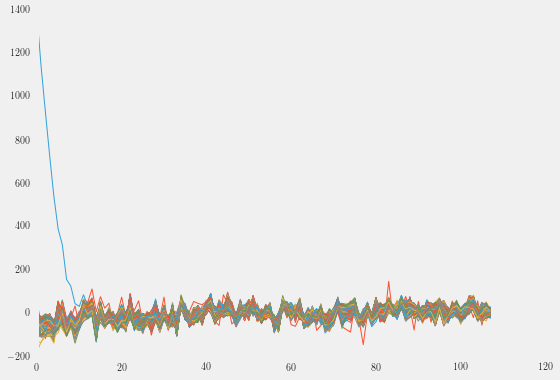

In [49]:
plot(darks_flat_sample.T - median(darks_flat_sample,axis=1));

In [50]:
darks_flat_sample.shape

(5000, 108)

In [51]:
for k in range(darks_flat_sample.shape[0]):
    if (darks_flat_sample[k] - median(darks_flat_sample[k]) > 200).any():
        print(k)

850


In [52]:
std(abs(darks_flat_sample[850] / median(darks_flat_sample[850]))-1), 2*darks_med_std

(0.0051697831038977913, 0.0079730175048939797)

In [53]:
darks_flat_sample0 = darks_flat_sample.copy()
darks_flat_sample = vstack([darks_flat_sample0[:850], darks_flat_sample0[851:]])#.shape

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


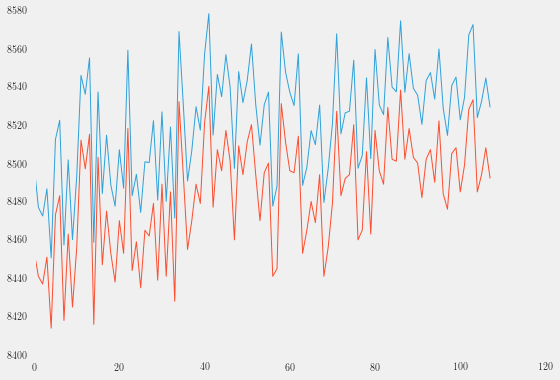

In [54]:
plot(np.mean(darks_flat,axis=0))
plot(np.median(darks_flat,axis=0))

In [44]:
np.median(darks_flat,axis=0).shape

(108,)

In [55]:
darks_flat_med_axis0 = np.median(darks_flat,axis=0)
darks_flat_med_axis1 = np.median(darks_flat,axis=1)

In [57]:
darks_flat_std_axis0 = np.std(darks_flat,axis=0)
darks_flat_std_axis1 = np.std(darks_flat,axis=1)

In [58]:
darks_flat_std_axis1.shape

(4188264,)

In [59]:
darks_flat_med_axis0.shape,darks_flat_med_axis1.shape

((108,), (4188264,))

In [60]:
darks_flat_sample_med1 = np.median(darks_flat_sample,axis=1)

In [61]:
print(darks_flat_med_axis0.shape, darks_flat_sample_med1.shape)

(108,) (4999,)


In [62]:
darks_flat_sample.shape

(4999, 108)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


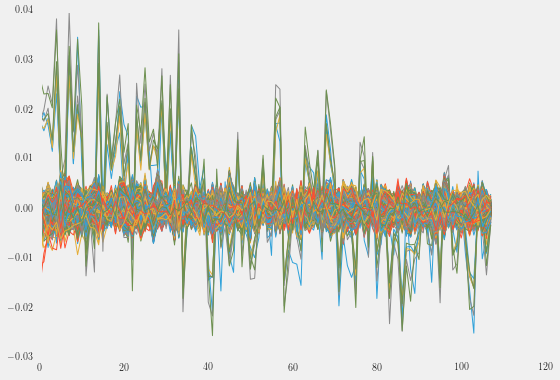

In [63]:
plot((darks_flat_sample / darks_flat_med_axis0).T - median(darks_flat_sample / darks_flat_med_axis0,axis=1));

Remove Common Mode variations from frame to frame (time series)
---
Probably related to bias drifting

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


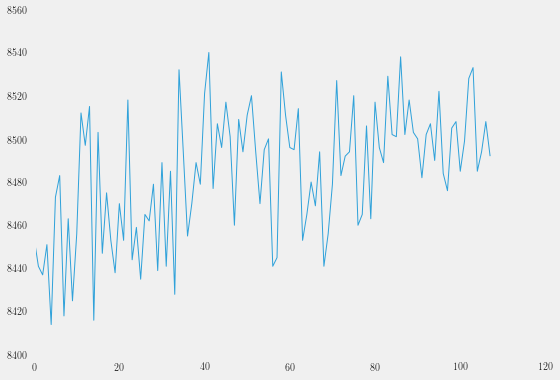

In [64]:
plot(darks_flat_med_axis0)

In [65]:
quirks_store_smooth      = np.copy(quirks_store)      #/ darks_flat_med_axis0
rtn_syn_smooth           = np.copy(rtn_syn)           #/ darks_flat_med_axis0
darks_flat_sample_smooth = np.copy(darks_flat_sample) #/ darks_flat_med_axis0

In [66]:
print(quirks_store_smooth.shape, rtn_syn_smooth.shape, darks_flat_sample_smooth.shape)

(5042, 108) (1000, 108) (4999, 108)


/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


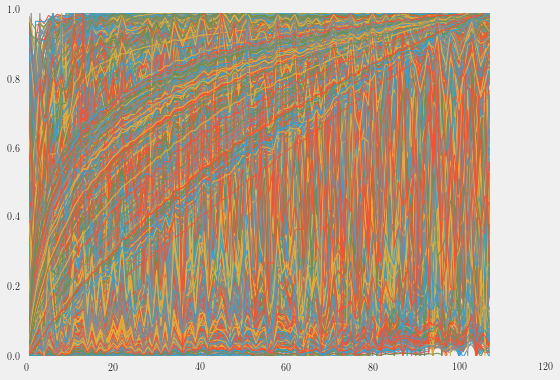

In [67]:
plot(((quirks_store_smooth.T - np.min(quirks_store_smooth,axis=1)) / (np.max(quirks_store_smooth,axis=1) - np.min(quirks_store_smooth,axis=1))));

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


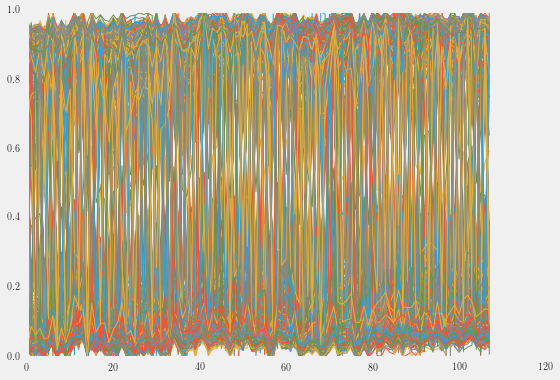

In [68]:
plot(((rtn_syn_smooth.T - np.min(rtn_syn_smooth,axis=1)) / (np.max(rtn_syn_smooth,axis=1) - np.min(rtn_syn_smooth,axis=1))));

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


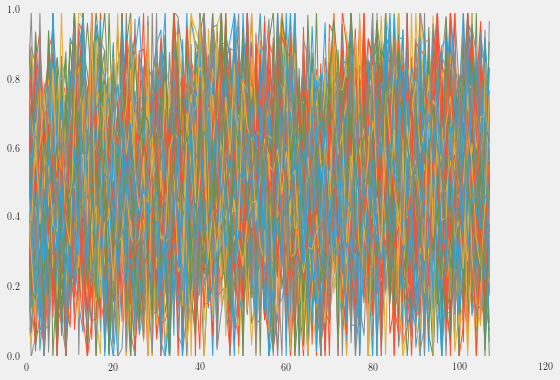

In [69]:
quirksNoisy = quirks_store_smooth[classes_store==1]
plot(((quirksNoisy.T - np.min(quirksNoisy,axis=1)) / (np.max(quirksNoisy,axis=1) - np.min(quirksNoisy,axis=1))));

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


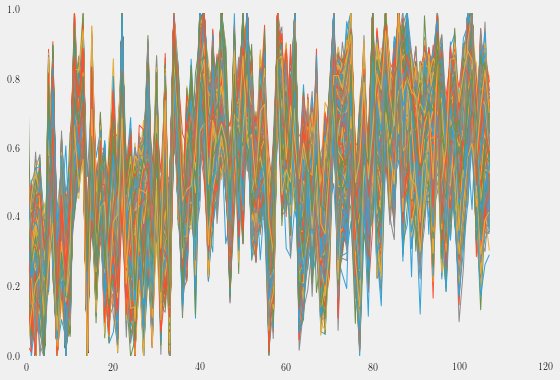

In [70]:
plot(((darks_flat_sample_smooth.T - np.min(darks_flat_sample_smooth,axis=1)) / (np.max(darks_flat_sample_smooth,axis=1) - np.min(darks_flat_sample_smooth,axis=1))));

Random Forest Classification
---

Load Sci-kit Learn Libraries

In [71]:
from sklearn.ensemble         import RandomForestClassifier
from sklearn.utils            import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.externals        import joblib

In [103]:
darks_classes     = np.zeros(darks_flat_sample_smooth.shape[0],dtype=int)
rtn_classes       = np.ones(rtn_syn_smooth.shape[0],dtype=int)*3
samples_train_set = vstack([quirks_store, rtn_syn, darks_flat_sample])
classes_train_set = vstack([classes_store[:,None], rtn_classes[:,None], darks_classes[:,None]])[:,0]

In [104]:
samples_train_set.shape

(11041, 108)

In [105]:
samples_train_set_resort = shuffle(np.copy(samples_train_set), random_state=42)
classes_train_resort = shuffle(np.copy(classes_train_set), random_state=42)

Rescaled all samples from 0 to 1

In [106]:
samples_train_set_resort.shape

(11041, 108)

In [107]:
samples_train_set_resort_scaled = ((       samples_train_set_resort.T  - np.min(samples_train_set_resort,axis=1)) / \
                                   (np.max(samples_train_set_resort,axis=1) - np.min(samples_train_set_resort,axis=1))).T

In [108]:
samples_train_set_resort_scaled.shape

(11041, 108)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


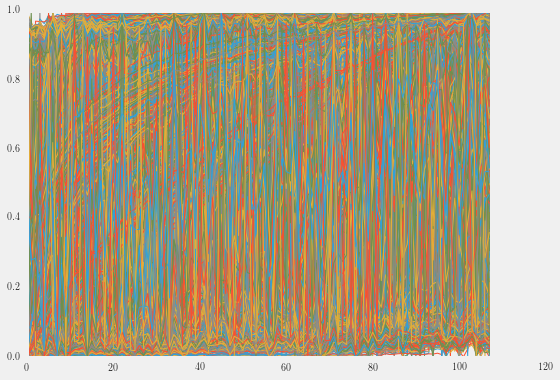

In [109]:
plot(samples_train_set_resort_scaled.T);

Establish Random Forest Classification
- 1000 trees
- OOB Score
- Multiprocessing

In [110]:
rfc = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, verbose=True)

Split Samples into 75% Train and 25% Test

Shuffle Training Data Set

Train Classifier with `rfc.fit`

In [111]:
rfc.fit(samples_train_set_resort_scaled, classes_train_resort)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   26.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=True,
            warm_start=False)

Score Classifier with Test Data Score

In [112]:
rfc.score(samples_train_set_resort_scaled, classes_train_resort)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.5s finished


1.0

Score Classifier with Out-of-Bag Error

In [113]:
rfc.oob_score_

0.99266370799746395

Save Random Forest Classifier becuse 98% is AWESOME!

In [114]:
joblib.dump(rfc, 'trained_RF_Classifier/random_forest_classifier_trained_on_resorted_samples_train_set_RTN_CR_HP_Other_Norm.save')
joblib.dump(dict(samples=samples_train_set_resort_scaled.T, classes=classes_train_resort), 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save')

['trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save',
 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save_01.npy',
 'trained_RF_Classifier/RTN_CR_HP_Other_Norm_resorted_samples_train_set.save_02.npy']

In [115]:
darks_reshaped.shape

(4194304, 108)

In [85]:
step     = 0
skipsize = 100
chunkNow = arange(step*darks_reshaped.shape[0]//skipsize,min((step+1)*darks_reshaped.shape[0]//skipsize, darks_reshaped.shape[0]))

In [86]:
darks_reshaped_chunk        = darks_reshaped[chunkNow]
darks_reshaped_chunk_smooth = darks_reshaped_chunk #/ darks_flat_med_axis0
darks_reshaped_chunk_scaled = ((darks_reshaped_chunk_smooth.T - np.min(darks_reshaped_chunk_smooth,axis=1)) / \
                              ((np.max(darks_reshaped_chunk_smooth,axis=1) - np.min(darks_reshaped_chunk_smooth,axis=1)))).T

In [89]:
samples_train_set_resort_scaled.shape, darks_reshaped_chunk_smooth.shape

((11041, 108), (41943, 108))

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


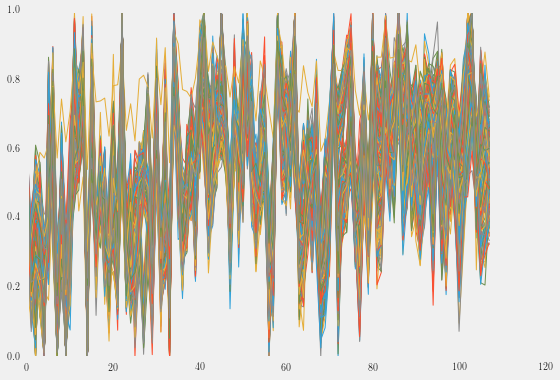

In [90]:
plot((darks_reshaped_chunk_scaled[::100]).T);

In [124]:
rfc_pred = np.zeros(darks_reshaped.shape[0])
rfc2_pred= np.zeros(darks_reshaped.shape[0])
step     = 0
skipsize = 50

gapSize  = rfc_pred.size//skipsize

start = time()
for step in range(skipsize):
    chunkNow = arange(step*gapSize,min((step+1)*gapSize, rfc_pred.size))
    print(chunkNow.min(), chunkNow.max(), end=" ")
    #
    # darks_reshaped_k_scaled = ((darks_reshaped[chunkNow].T - np.min(darks_reshaped[chunkNow],axis=1)) / \
    #                           ((np.max(darks_reshaped[chunkNow],axis=1) - np.min(darks_reshaped[chunkNow],axis=1)))).T
    # darks_reshaped_chunk        = darks_reshaped[chunkNow]
    # darks_reshaped_chunk_smooth = darks_reshaped_chunk #/ darks_flat_med_axis0
    darks_reshaped_chunk_scaled = ((darks_reshaped[chunkNow].T - np.min(darks_reshaped[chunkNow],axis=1)) / \
                                  ((np.max(darks_reshaped[chunkNow],axis=1) - np.min(darks_reshaped[chunkNow],axis=1)))).T
    #
    rfc_pred[chunkNow]  = rfc.predict(darks_reshaped_chunk_scaled)
    badPix              = rfc_pred != 0.0
    numBad              = badPix.sum()
    percentBad          = str(numBad / rfc_pred.size * 100)[:5] + '%'
    print(percentBad, rfc_pred[badPix][::numBad//10])

print('Operation Took ' + str(time() - start) + ' seconds')

0 83885 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    8.6s finished


0.127661151783 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
83886 167771 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.8s finished


0.147139154248 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
167772 251657 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.3s finished


0.139764523298 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
251658 335543 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.118482360212 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
335544 419429 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.8s finished


0.120233015582 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
419430 503315 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished


0.148652004048 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
503316 587201 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished


0.128036748973 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
587202 671087 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    8.1s finished


0.119779067672 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
671088 754973 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.8s finished


0.117268781496 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
754974 838859 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.8s finished


0.126676426186 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
838860 922745 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.141618473638 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
922746 1006631 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.2s finished


0.143349870477 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1006632 1090517 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


0.133747030737 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1090518 1174403 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.124269625559 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1174404 1258289 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished


0.139364647659 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1258290 1342175 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.3s finished


0.129777578955 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1342176 1426061 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.145707146579 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1426062 1509947 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.3s finished


0.147392839425 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1509948 1593833 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.142306058222 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1593834 1677719 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished


0.152834721276 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1677720 1761605 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.5s finished


0.163437378704 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1761606 1845491 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.154429379145 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1845492 1929377 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.131597225625 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
1929378 2013263 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.4s finished


0.158441673477 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2013264 2097149 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.5s finished


0.152081499785 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]
2097150 2181035 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.5s finished


0.13127060619 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2181036 2264921 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.127829232516 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2264922 2348807 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


0.142766565418 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2348808 2432693 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.9s finished


0.162994171341 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2432694 2516579 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.4s finished


0.146796986299 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2516580 2600465 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.1s finished


0.141023251288 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2600466 2684351 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.7s finished


0.161991331139 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2684352 2768237 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.0s finished


0.139782770643 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.]
2768238 2852123 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.0s finished


0.133661672564 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2852124 2936009 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


0.114442085087 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2936010 3019895 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.3s finished


0.128951022188 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3019896 3103781 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


0.126053586089 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3103782 3187667 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.2s finished


0.126856290873 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3187668 3271553 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.5s finished


0.133226023196 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3271554 3355439 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.8s finished


0.1379644745 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3355440 3439325 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.6s finished


0.119468802603 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3439326 3523211 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.7s finished


0.124868230312 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.]
3523212 3607097 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.8s finished


0.123338765717 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3607098 3690983 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    5.1s finished


0.116848393629 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3690984 3774869 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    4.9s finished


0.134950088656 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3774870 3858755 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.0s finished


0.132782304974 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3858756 3942641 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.3s finished


0.12567187197 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
3942642 4026527 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.9s finished


0.127471580326 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4026528 4110413 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    6.6s finished


0.147772280624 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4110414 4194299 

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    7.9s finished


0.130639250076 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Operation Took 557.1945140361786 seconds


In [131]:
print(str((rfc_pred != 0.0).sum() / rfc_pred.size * 100)[:5] + '%')

0.205%


In [132]:
for k in range(6):
    print(k,sum(rfc_pred == k))

0 4185679
1 1157
2 4445
3 619
4 1325
5 574


In [133]:
rfc_pred_train = rfc.predict(samples_train_set_resort_scaled)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.0s finished


In [136]:
1-np.abs(rfc_pred_train - classes_train_resort).sum() / classes_train_resort.size, rfc.score(samples_train_set_resort_scaled, classes_train_resort)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.5s finished


(1.0, 1.0)

Could this be an RTN? 


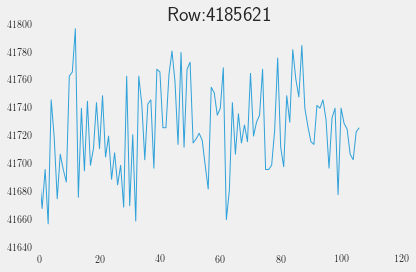

In [141]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
class3Check = []
for iRTN, irow in enumerate(np.where(rfc_pred == 3)[0]):
    # ax.lines.pop()
    ax.clear()
    ax.plot(darks_reshaped[irow][1:]);
    ax.set_title('Row:' + str(irow) + ' iRTN:' + str(iRTN) + ' / ' + str(sum(rfc_pred == 3
                                                                            )))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    class3Check.append(input('Could this be an RTN? '))

In [148]:
class3Check_array = np.zeros(len(class3Check), dtype=bool)
for k, c3cNow in enumerate(class3Check):
    if c3cNow.lower() in ['', 'y', 'd', 'yu']:
        class3Check_array[k] = True
    elif c3cNow.lower() in ['o']:
        class3Check_array[k-1] = True
    elif c3cNow.lower() in ['n']:
        class3Check_array[k] = False
    else:
        print(k, c3cNow)

In [155]:
class3Check_array.size, len(class3Check)

(619, 619)

/Users/jonathanfraine/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


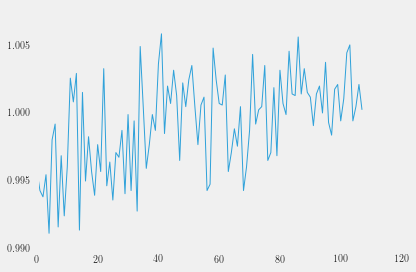

In [161]:
plot(darks_flat_med_axis0 / median(darks_flat_med_axis0))

In [163]:
darks_flat_med_axis0_norm = darks_flat_med_axis0[1:] / median(darks_flat_med_axis0[1:])

KeyboardInterrupt: 

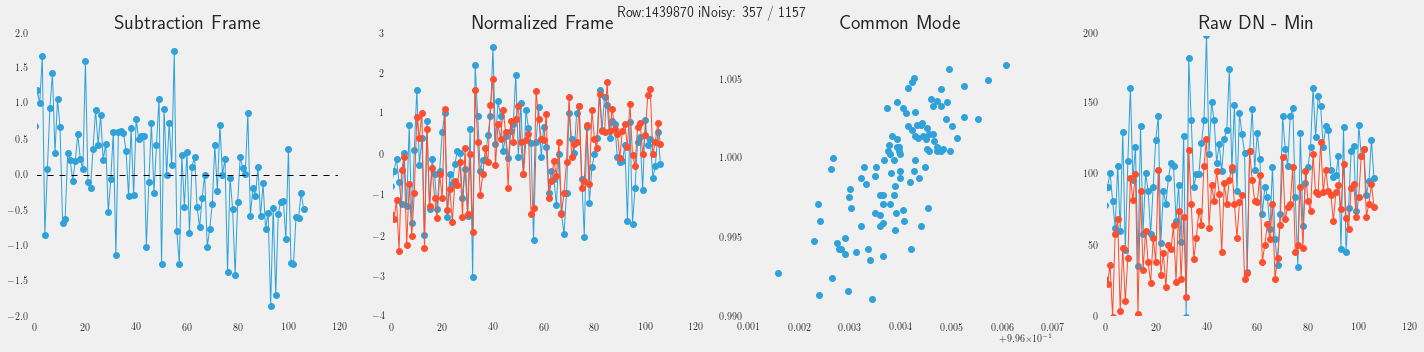

In [199]:
fig = figure(figsize=(20,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# ax.plot([nan,nan])
class1Check = []
for iNoisy, irow in enumerate(np.where(rfc_pred == 1)[0]):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    # ax1.plot(darks_reshaped[irow][1:] / median(darks_reshaped[irow][1:]) - darks_flat_med_axis0_norm);
    
    # Plot Subtraction frame: (Darknow - min(Darknow)) - (DarkMed - min(DarkMed))
    # darkNowMinusMed = (darks_reshaped[irow][1:] - np.min(darks_reshaped[irow][1:])) - \
    #                   (darks_flat_med_axis0[1:] - np.min(darks_flat_med_axis0[1:]))
    
    darkNowMinusMed = pp.scale(darks_reshaped[irow][1:]) - pp.scale(darks_flat_med_axis0_norm)
    ax1.plot(darkNowMinusMed,'o-')
    ax1.axhline(median(darkNowMinusMed), linestyle='--', color='k')
    ax1.set_title('Subtraction Frame')
    # ax1.plot(darks_reshaped[irow][1:] / median(darks_reshaped[irow][1:]) / darks_flat_med_axis0_norm - 1);
    
    # Plot Normalized Frame: DarkNow vs DarMed
    ax2.plot(pp.scale(darks_reshaped[irow][1:]),'o-');
    ax2.plot(pp.scale(darks_flat_med_axis0_norm),'o-')
    ax2.set_title('Normalized Frame')
    
    # Plot Common Mode Correlation Frame
    ax3.plot(darks_reshaped[irow][1:] / median(darks_reshaped[irow][1:]), darks_flat_med_axis0_norm,'o')
    ax3.set_title('Common Mode')
    
    # Plot Raw DN minus Min Dark Ramp: DarkNow - min(DarkNow) vs DarkMed - min(DarkMed)
    ax4.plot(darks_reshaped[irow][1:] - np.min(darks_reshaped[irow][1:]),'o-')
    ax4.plot(darks_flat_med_axis0[1:] - np.min(darks_flat_med_axis0[1:]),'o-')
    ax4.set_title('Raw DN - Min')
    
    # ax.plot(darks_flat_med_axis0[1:] / median(darks_flat_med_axis0[1:]))
    #ax1.set_title('Row:' + str(irow) + ' iNoisy: ' + str(iNoisy) + ' / ' + str(sum(rfc_pred == 1)))
    fig.suptitle('Row:' + str(irow) + ' iNoisy: ' + str(iNoisy) + ' / ' + str(sum(rfc_pred == 1)))
    # ax1.set_ylim(ax2.get_ylim())
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    class1Check.append(input('Could this be an RTN? '))

In [ ]:
fig = figure()#figsize=(6,6))
ax  = fig.add_subplot(111)
# ax.plot([nan,nan])
rtn_synCheck = []
for iRTN, rtnNow in enumerate(rtn_syn):
    # ax.lines.pop()
    ax.clear()
    ax.plot(rtnNow);
    ax.set_title('iRTN:' + str(iRTN) + ' / ' + str(len(rtn_syn)))
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #class3Check.append(input('Could this be an RTN? '))